<a href="https://colab.research.google.com/github/itsniranjan/Data_Science/blob/main/datadebug1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem** **Statement**

---



**Harry** is a history student and an aspiring archaeologist, his teacher is a prominent archaeologist. During one of his teacher's recent ventures in England, he found a set of old books which had detailed information regarding the people affected by the swife flu in the 1500s, and the number of deaths in six provinces for each week, collected over the course of 24 weeks. Harry's teacher assigned some duties to Harry as his final year assignment. He was supposed to do the following things, however Harry is no data science expert, so he has resorted to the help of one of his best friends, which is you. You are supposed to help Harry with his final year assignment by answering the questions and plotting the graphs his teacher requested.
 
Note: The dataset needs to be cleaned to not have any formatting errors, datatype errors, missing data, or non-sensical data entries before performing operations upon.

Link to Dataset: https://github.com/marahim20/DataDebug2021/blob/main/DATAdebug.csv

The given data of Old England is divided into 6 provinces, Harry's teacher wants this data incorporated in the dataset. Names of those provinces and their corresponding pin codes range are given below:

1.   Durmstrang     : E06000001-E06000060
2.   Hogwarts       : E07000008-E07000246
3.   Hogsmeade      : E08000001-E08000037
4.   Nurmengard     : E09000001-E09000033
5.   Azkaban        : W06000001-W06000024
6.   Godirc's Hollow: W11000023-W11000031


In [ ]:
#Your Code here
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/marahim20/DataDebug2021/main/DATAdebug.csv'
df = pd.read_csv(url)
df1= df.dropna()
df1['Death Count'].replace({"nil":"0"},inplace=True)
df1['Week'].replace({"One":"1", "one":"1","two":"0","Two":"0"},inplace=True)
df1["Week"] =pd.to_numeric(df1["Week"])
df1["Death Count"] =pd.to_numeric(df1["Death Count"])
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,PIN Code,Geography type,Area name,Cause of death,Week,Place of death,Death Count
0,E06000001,Local Authority,Hartlepool,Other Causes,1,Nursing home,3
1,E06000001,Local Authority,Hartlepool,Other Causes,1,Elsewhere,0
2,E06000001,Local Authority,Hartlepool,Other Causes,1,Home,7
3,E06000001,Local Authority,Hartlepool,Other Causes,1,Hospice,1
5,E06000001,Local Authority,Hartlepool,Other Causes,1,Hospital,14


In [ ]:
df1[['PIN Code','Death Count']].groupby(['PIN Code']).sum()
provinces=list()
for pin in df1['PIN Code']:
  if(pin >= 'E06000001' and pin<= 'E06000060'):
    provinces.append('Durmstrang')
  if(pin >= 'E07000008' and pin<= 'E07000246'):
    provinces.append('Hogwarts')
  if(pin >= 'E08000001' and pin<= 'E08000037'):
    provinces.append('Hogsmeade')
  if(pin >= 'E09000001' and pin<= 'E09000033'):
    provinces.append('Nurmengard')
  if(pin >= 'W06000001' and pin<= 'W06000024'):
    provinces.append('Azkaban')
  if(pin >= 'W11000023' and pin<= 'W11000031'):
    provinces.append('Godirc\'s Hollow')
print(len(provinces))




# Durmstrang : E06000001-E06000060
# Hogwarts : E07000008-E07000246
# Hogsmeade : E08000001-E08000037
# Nurmengard : E09000001-E09000033
# Azkaban : W06000001-W06000024
# Godirc's Hollow: W11000023-W110000

98784


In [ ]:
p=pd.DataFrame(data={'province':provinces})
p['province'].value_counts()
df1['province']=p
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PIN Code,Geography type,Area name,Cause of death,Week,Place of death,Death Count,province
0,E06000001,Local Authority,Hartlepool,Other Causes,1,Nursing home,3,Durmstrang
1,E06000001,Local Authority,Hartlepool,Other Causes,1,Elsewhere,0,Durmstrang
2,E06000001,Local Authority,Hartlepool,Other Causes,1,Home,7,Durmstrang
3,E06000001,Local Authority,Hartlepool,Other Causes,1,Hospice,1,Durmstrang
5,E06000001,Local Authority,Hartlepool,Other Causes,1,Hospital,14,Durmstrang




#  ***Quiz***
1. Find the total number of people died during the 24 week period


365291


<Figure size 720x360 with 0 Axes>

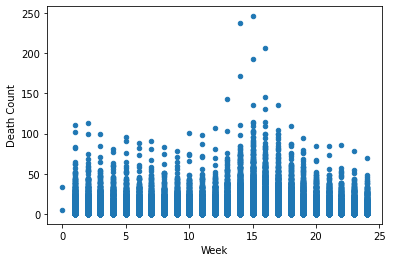

In [ ]:
#Your Code here
print(df1['Death Count'].sum())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
df1.plot.scatter(x="Week", y="Death Count");

In [ ]:

Answer =   .365291#@param



  2. Find the total number of people who died due to swine flu at hospitals



PIN Code          49392
Geography type    49392
Area name         49392
Cause of death    49392
Week              49392
Place of death    49392
Death Count       49392
province          49386
dtype: int64

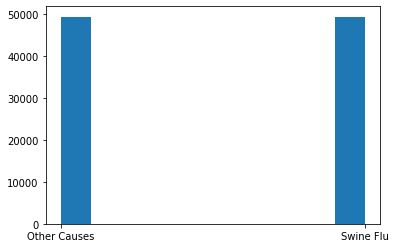

In [ ]:
#Your Code here
plt.hist(df1['Cause of death'])
df1[df1['Cause of death']=='Swine Flu'].count()
# df2=df1[df1['Cause of death'].isin(['Swine Flu'])]
# df2['Death Count'].sum()

In [ ]:
Answer =   49392#@param

3. Find the name of the area where the most number of people died due to causes other than swine flu

In [ ]:
#Your Code here
df3=df1[df1['Cause of death']!='Swine Flu']
df3['Area name'].value_counts().idxmax()

'Liverpool'

In [ ]:
Answer =   'Liverpool'#@param

4. Find the name of the province with most number of deaths

In [ ]:
df3=df1[['province','Death Count']]
df3.groupby(['province']).sum()

,Death Count
province,
Azkaban,20014
Durmstrang,78761
Godirc's Hollow,19625
Hogsmeade,74595
Hogwarts,132387
Nurmengard,39874


In [ ]:
Answer =   'Hogwartz'#@param

#  ***Graphs***
  

1.   Plot a graph showing the number of people who died of swine flu and the places they died at.




                              Death Count
Place of death                           
Hospital                           167453
Nursing home                        99691
Home                                78379
Hospice                             13580
Elsewhere                            4690
Other communal establishment         1498


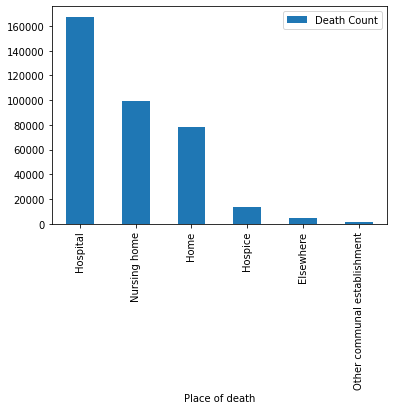

In [ ]:
#Your Code here
df3=df1[['Place of death','Death Count']]
df4=(df3.groupby(['Place of death']).sum().sort_values(by='Death Count', ascending=False))
print(df4)
df4.plot(kind='bar')

2. Plot a graph showing the death count of areas under local authority and health board.



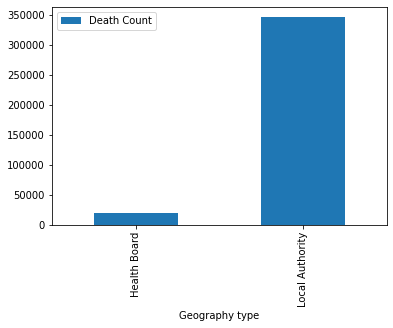

In [ ]:
#Your Code here
df1[['Geography type','Death Count']].groupby(['Geography type']).sum().plot(kind='bar')

3. Plot a graph to show the trend of the death count every week.

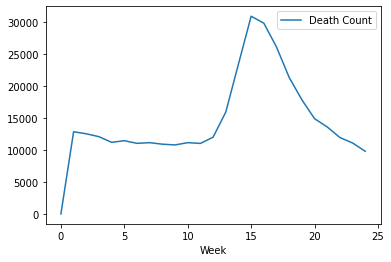

In [ ]:
#Your Code here
df1[['Week','Death Count']].groupby(['Week']).sum().plot()

4. Plot a graph to show death count per province.


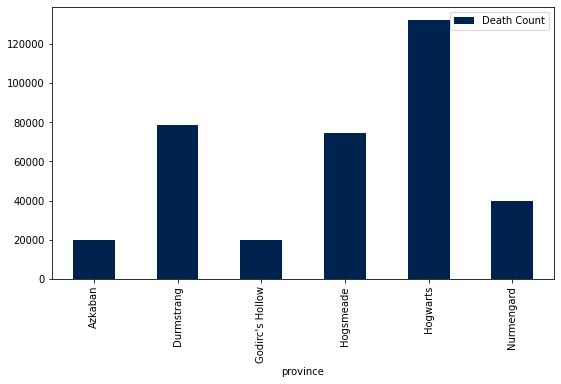

In [ ]:
#Your Code here
df1[['province','Death Count']].groupby(['province']).sum().plot(kind='bar', figsize=(9,5), cmap='cividis')
# ‘line’ : line plot (default)
# ‘bar’ : vertical bar plot
# ‘barh’ : horizontal bar plot
# ‘hist’ : histogram
# ‘box’ : boxplot
# ‘kde’ : Kernel Density Estimation plot
# ‘density’ : same as ‘kde’
# ‘area’ : area plot
# ‘pie’ : pie plot
# ‘scatter’ : scatter plot
# ‘hexbin’ : hexbin plot